In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = 'DAIGT(Shuffled data).csv'
df = pd.read_csv(input_file)
df.head(10)

,text,label
0,There is a debate today day about whether the ...,0
1,"Dear Florida state senator, The Electoral Coll...",0
2,The technology to read students emotions isn't...,0
3,"Take classes Online can help busy students, bu...",0
4,"Dear Senator, ""The Electoral College is a proc...",0
5,Do you participate in any after school activit...,0
6,We do not think that the face was created by a...,0
7,Driverless cars are the future of technology.\...,0
8,Dear Principle\n\nI think that it would be a r...,0
9,I am totally against driverless cars. It seems...,0


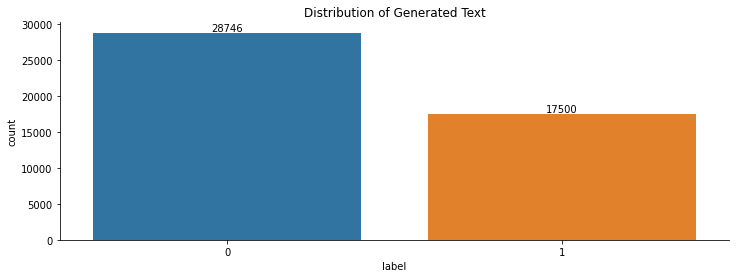

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df, x="label")

abs_values = df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

In [4]:
# Shuffling the data
shuffled_data = df.sample(frac=1, random_state=21)

In [5]:
shuffled_data.head()

,text,label
24273,"Dear Principal,\n\nI have noticed you were dec...",0
42892,Driverless cars are in our near futrue. Cars l...,0
11042,Imagine summer break coming to an end you woul...,0
22776,"dear, senators of USA. in the manner of arguin...",0
42852,"In recent years, some businesses have adopted...",1


In [6]:
input_file = 'combined.csv'
df_ai = pd.read_csv(input_file)
df_ai.head(10)

,text,label
0,The report also includes a discussion of the r...,1
1,The answer is that it's not. It's a matter of ...,1
2,Discuss the importance of extroversion and ext...,1
3,The Face On Mars is a real phenomenon. It is n...,1
4,The next part of this series will be about how...,1
5,What is the difference between a school and a ...,1
6,The Face On Mars is a real phenomenon. It is n...,1
7,The book will be published by the University o...,1
8,Discuss the importance of extroversion and ext...,1
9,The next part of this series will be about how...,1


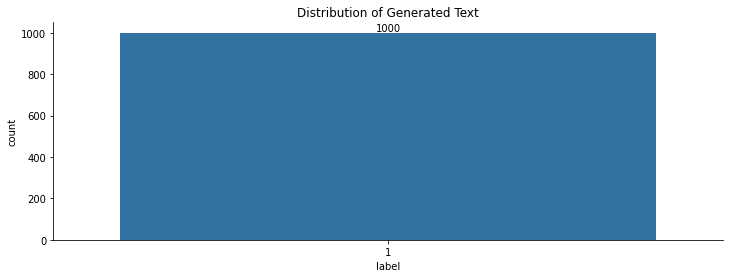

In [7]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df_ai, x="label")

abs_values = df_ai['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

### Implementation of TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X_train = vectorizer.fit_transform(shuffled_data["text"])
X_test = vectorizer.transform(df_ai["text"])
y_train = shuffled_data["label"]
y_test = df_ai["label"]

In [10]:
np.size(y_train)

46246

In [11]:
np.size(y_test)

1000

In [12]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 0
Number of 1s: 1000


### Multinomial Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

In [15]:
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 5.50%
Precision: 100.00%
Recall: 5.50%
F1 Score: 10.43%


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [17]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 40.60%
Precision: 100.00%
Recall: 40.60%
F1 Score: 57.75%


In [18]:
# Changing the number of trees and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 27.40%
Precision: 100.00%
Recall: 27.40%
F1 Score: 43.01%


### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=42)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [21]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 39.40%
Precision: 100.00%
Recall: 39.40%
F1 Score: 56.53%
